In [1]:
import os
import torch
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from torch.utils.data import DataLoader
from modules.lifter_2d_3d.dataset.groundtruth_keypoint_dataset import GroundTruthKeypointDataset
from modules.lifter_2d_3d.model.linear_model.lit_linear_model import LitSimpleBaselineLinear
from modules.utils.visualization import (
    plot_samples
)
from IPython.display import display
from pathlib import Path
pl.seed_everything(1234)

# ------------
# dataset path
# ------------
dataset_root_path = Path('/root/synthetic_cabin_1m/syntheticcabin_1mil/processed_syntheticCabin_1m/A_Pillar_Codriver/')
keypoint_2d_path = dataset_root_path / 'annotations'
keypoint_3d_path = dataset_root_path / 'annotations'
# ------------
# model
# ------------
image_width = 1280
image_height = 1024
batch_size = 64
max_epoch = 200
val_check_period = 5
early_stopping_patience = 5
lit_model = LitSimpleBaselineLinear(exclude_ankle=True, exclude_knee=True)
# ------------
# saved model path
# ------------
saved_model_path = './saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir_1m/A_Pillar_Codriver/gt_2d/'


train_dataset = GroundTruthKeypointDataset(
    annotation_file=(keypoint_3d_path / 'person_keypoints_train.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True
)
val_dataset = GroundTruthKeypointDataset(
    annotation_file=(keypoint_3d_path / 'person_keypoints_val.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True
)
test_dataset = GroundTruthKeypointDataset(
    annotation_file=(keypoint_3d_path / 'person_keypoints_test.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True
)

print(
    'train_dataset', len(train_dataset),
    'val_dataset', len(val_dataset),
    'test_dataset', len(test_dataset)
)
train_loader = DataLoader(train_dataset, batch_size=batch_size, drop_last=True, shuffle=True, num_workers=24)
val_loader = DataLoader(val_dataset, batch_size=batch_size, drop_last=True, num_workers=24)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=24)

model_checkpoint = ModelCheckpoint(monitor='val_loss',mode='min', save_top_k=1)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=early_stopping_patience)


if not os.path.exists(saved_model_path):
    os.makedirs(saved_model_path)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
trainer = pl.Trainer(
    # max_steps=10,
    max_epochs=max_epoch,
    callbacks=[model_checkpoint, early_stopping],
    accelerator=device,
    check_val_every_n_epoch=val_check_period,
    default_root_dir=saved_model_path,
    gradient_clip_val=1.0
)
trainer.fit(lit_model, train_loader, val_loader)

Global seed set to 1234
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


train_dataset 75000 val_dataset 37500 test_dataset 30349


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type          | Params
----------------------------------------
0 | model | BaselineModel | 4.3 M 
----------------------------------------
4.3 M     Trainable params
0         Non-trainable params
4.3 M     Total params
17.105    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

check #0
val MPJPE from: 128 samples : 5078.357696533203
activity_macro_mpjpe nan


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

check #1
training loss from 5855 batches: 262.0034752494753
val MPJPE from: 37440 samples : 100.88258981704712
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #2
training loss from 5855 batches: 125.39575519239057
val MPJPE from: 37440 samples : 76.94590091705322
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #3
training loss from 5855 batches: 115.12946528466108
val MPJPE from: 37440 samples : 71.73396646976471
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #4
training loss from 5855 batches: 108.10652203940613
val MPJPE from: 37440 samples : 68.91659647226334
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #5
training loss from 5855 batches: 103.65331544263255
val MPJPE from: 37440 samples : 66.41194969415665
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #6
training loss from 5855 batches: 100.49837991709795
val MPJPE from: 37440 samples : 66.4491131901741
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #7
training loss from 5855 batches: 98.35051760192003
val MPJPE from: 37440 samples : 66.59320741891861
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #8
training loss from 5855 batches: 96.67969681990645
val MPJPE from: 37440 samples : 64.95627015829086
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #9
training loss from 5855 batches: 95.35898550339584
val MPJPE from: 37440 samples : 64.74299728870392
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #10
training loss from 5855 batches: 94.39308802914559
val MPJPE from: 37440 samples : 63.42392414808273
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #11
training loss from 5855 batches: 93.49515959047844
val MPJPE from: 37440 samples : 62.914177775382996
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #12
training loss from 5855 batches: 92.88036966557996
val MPJPE from: 37440 samples : 62.438879162073135
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #13
training loss from 5855 batches: 92.24986024614485
val MPJPE from: 37440 samples : 62.67239153385162
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #14
training loss from 5855 batches: 91.8602096446552
val MPJPE from: 37440 samples : 62.97355890274048
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #15
training loss from 5855 batches: 91.4593123796656
val MPJPE from: 37440 samples : 62.77313828468323
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #16
training loss from 5855 batches: 91.23738726599413
val MPJPE from: 37440 samples : 62.868937849998474
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #17
training loss from 5855 batches: 90.9926429925364
val MPJPE from: 37440 samples : 62.456849962472916
activity_macro_mpjpe nan


In [2]:
with open(f'{saved_model_path}/best_model_path.txt', 'w') as f:
    f.writelines(model_checkpoint.best_model_path)
best_checkpoint_path = model_checkpoint.best_model_path
trainer.test(ckpt_path=best_checkpoint_path, dataloaders=test_loader)

Restoring states from the checkpoint path at saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir_1m/A_Pillar_Codriver/gt_2d/lightning_logs/version_1/checkpoints/epoch=59-step=70260.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir_1m/A_Pillar_Codriver/gt_2d/lightning_logs/version_1/checkpoints/epoch=59-step=70260.ckpt


Testing: 0it [00:00, ?it/s]

MPJPE: 58.92878530332093
PJPE
                      PJPE
nose             47.722771
left_eye         46.497395
right_eye        46.500572
left_ear         48.058200
right_ear        50.391158
left_shoulder    50.098696
right_shoulder   40.562486
left_elbow       78.681959
right_elbow      61.749217
left_wrist      104.220139
right_wrist      90.931205
left_hip         51.630294
right_hip        48.912043
activities_mpjpe:
{}
test mpjpe: 58.92878530332093
activity_macro_mpjpe nan


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           mpjpe           │     58.92878530332093     │
└───────────────────────────┴───────────────────────────┘

[{'mpjpe': 58.92878530332093}]

In [3]:
trainer.model.test_history[0]['pjpe']

,PJPE
nose,47.722771
left_eye,46.497395
right_eye,46.500572
left_ear,48.058200
right_ear,50.391158
left_shoulder,50.098696
right_shoulder,40.562486
left_elbow,78.681959
right_elbow,61.749217
left_wrist,104.220139


In [4]:
trainer.model.test_history[0]['mpjpe']

58.92878530332093

[741.0, 327.0, 1302.0, 1080.0]
[580.0, 207.0, 1236.0, 886.0]
[840.0, 70.0, 1778.0, 1077.0]


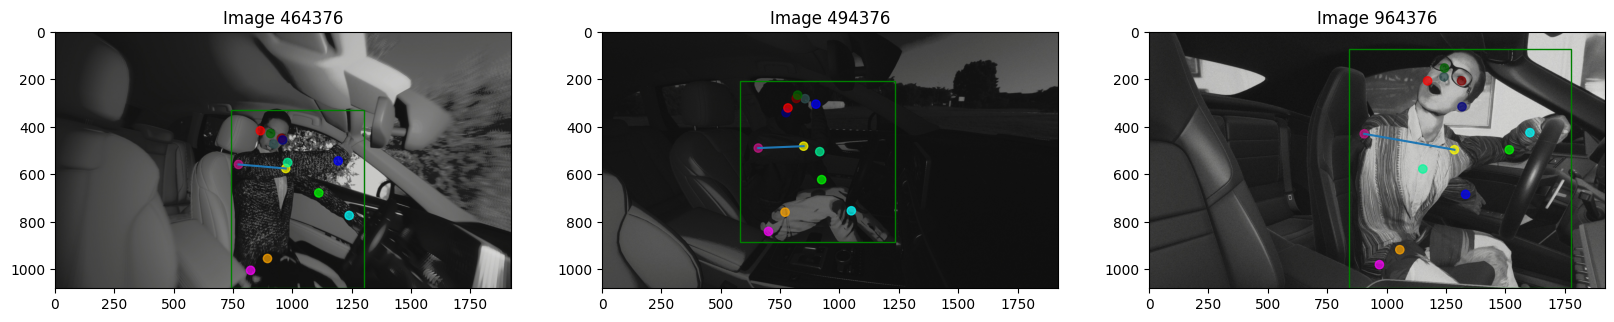

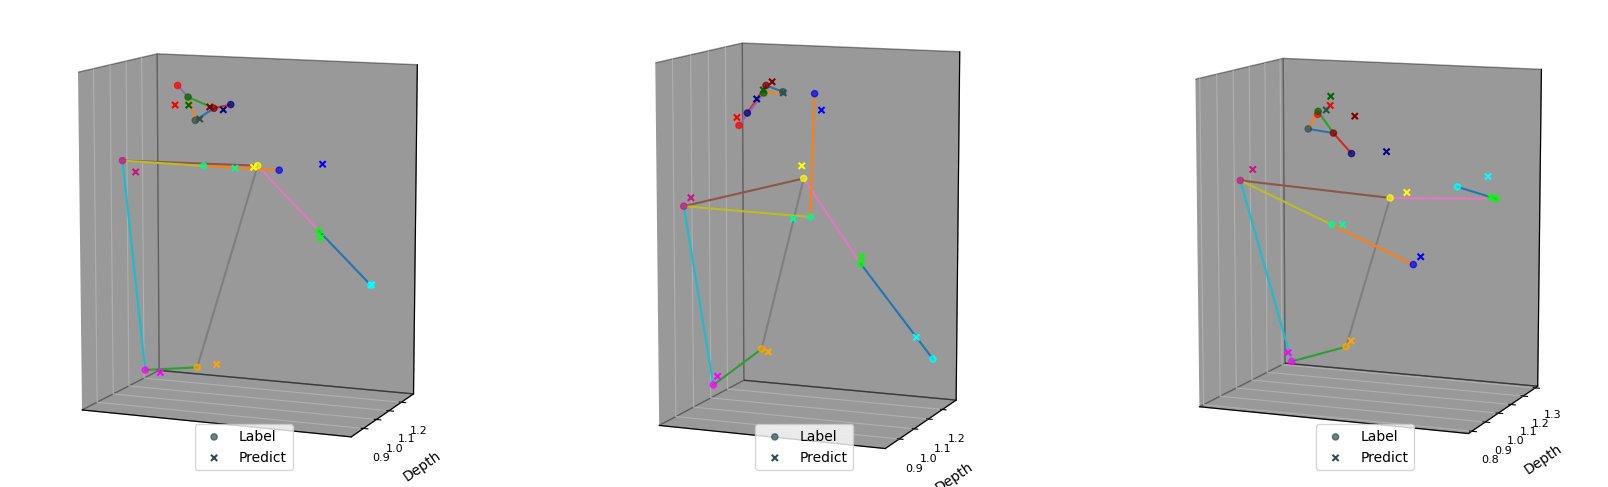

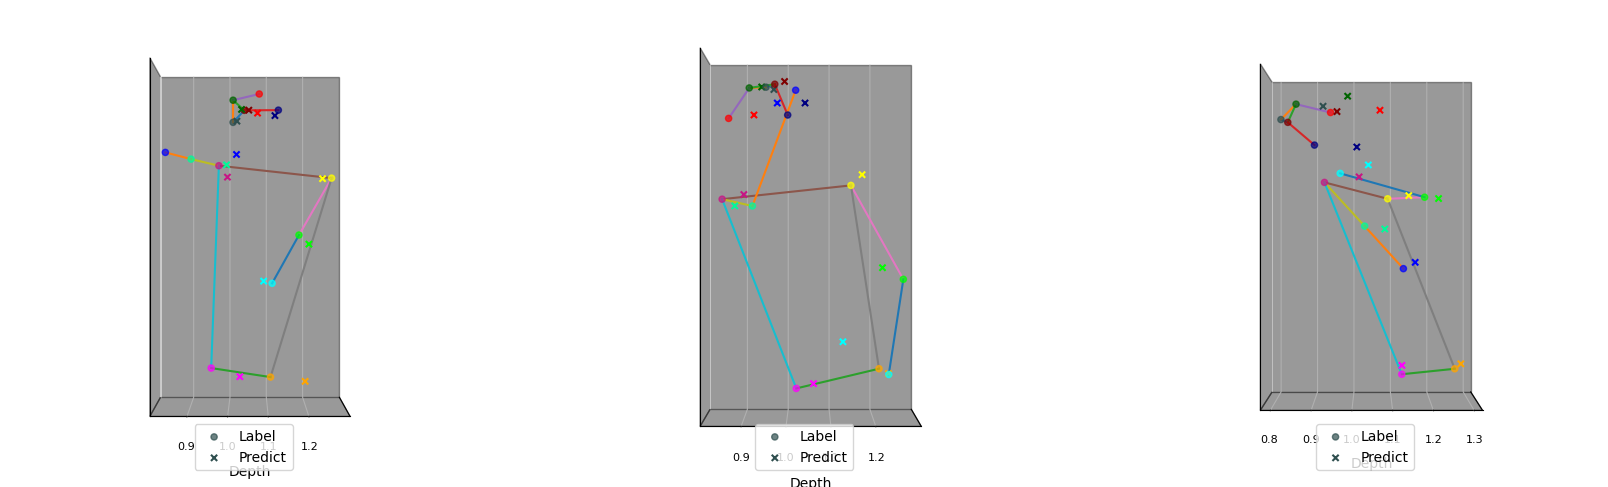

In [5]:
plot_samples(
    dataset_root_path,
    trainer.model,
    test_loader,
    'test',
    img_figsize=(20, 10),
    plot_figsize=(20.5, 10),
    sample_idices=[5000, 10000, 30000]
)